# Exploring Data

## Imports

In [1]:
from importlib.metadata import version
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [2]:
from importlib.metadata import version

In [3]:
list = ['pandas', 'numpy', 'seaborn', 'matplotlib', 'tensorflow']
for package in list:
    try:
        print(f"{package} version: {version(package)}") # Raises PackageNotFoundError if not found
    except:
         print(f"❌ Package '{package}' not found. Please install it.")

pandas version: 2.3.1
numpy version: 1.23.5
seaborn version: 0.13.2
matplotlib version: 3.10.5
❌ Package 'tensorflow' not found. Please install it.


## Data Preparation

In [2]:
# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/MaxPrestige/CA_Weather_Fire_Dataset_Cleaned/Data/CA_Weather_Fire_Dataset_Cleaned.csv")

c:\Users\brian\miniconda3\envs\WP_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df

DAY_OF_YEAR  MONTH    YEAR  SEASON  PRECIPITATION  \
0              1.0    1.0  1984.0     1.0            0.0   
1              2.0    1.0  1984.0     1.0            0.0   
2              3.0    1.0  1984.0     1.0            0.0   
3              4.0    1.0  1984.0     1.0            0.0   
4              5.0    1.0  1984.0     1.0            0.0   
...            ...    ...     ...     ...            ...   
14983          8.0    1.0  2025.0     1.0            0.0   
14984          9.0    1.0  2025.0     1.0            0.0   
14985         10.0    1.0  2025.0     1.0            0.0   
14986         11.0    1.0  2025.0     1.0            0.0   
14987         12.0    1.0  2025.0     1.0            0.0   

       LAGGED_PRECIPITATION  AVG_WIND_SPEED  LAGGED_AVG_WIND_SPEED  \
0                       0.0            4.70               4.700000   
1                       0.0            5.59               5.145000   
2                       0.0            5.37               5.220000   
3                       0.0            4.70               5.090000   
4                       0.0            5.14               5.100000   
...                     ...             ...                    ...   
14983                   0.0           10.51               6.485714   
14984                   0.0            4.92               6.550000   
14985                   0.0            3.58               6.327143   
14986                   0.0             NaN               6.561667   
14987                   0.0             NaN               7.068000   

       WIND_TEMP_RATIO  MIN_TEMP  TEMP_RANGE  FIRE_START_DAY  MAX_TEMP  
0             0.059494      51.0        28.0             0.0      79.0  
1             0.078732      46.0        25.0             0.0      71.0  
2             0.076714      47.0        23.0             0.0      70.0  
3             0.061842      45.0        31.0             0.0      76.0  
4             0.069459      49.0        25.0             0.0      74.0  
...                ...       ...         ...             ...       ...  
14983         0.143973      53.0        20.0             0.0      73.0  
14984         0.072353      46.0        22.0             0.0      68.0  
14985         0.051143      46.0        24.0             0.0      70.0  
14986              NaN      46.0        20.0             0.0      66.0  
14987              NaN      46.0        23.0             0.0      69.0  

[14988 rows x 13 columns]

## Notes

Mixture of regular and leap years

- 365 days normally in the year

- **366** during leap years (11 instances)

Timeline:

- Records **Begin** January 1, 1984

- Records **end** on January 12, 2025

Samples:

- 14,988 Data examples

Rows with Incomplete Entries:

- 12 Data examples

Final Sample count:

- 14,976 Data examples with 12 Features and 1 Label/Truth Value

In [7]:
# Show all entries that are null (empty)
empty_entries = df[df.isnull().any(axis=1)]

empty_entries

DAY_OF_YEAR  MONTH    YEAR  SEASON  PRECIPITATION  \
4808          60.0    3.0  1997.0     2.0            0.0   
4809          61.0    3.0  1997.0     2.0            0.0   
4810          62.0    3.0  1997.0     2.0            0.0   
14879        270.0    9.0  2024.0     4.0            0.0   
14971        362.0   12.0  2024.0     1.0            0.0   
14972        363.0   12.0  2024.0     1.0            0.0   
14973        364.0   12.0  2024.0     1.0            0.0   
14974        365.0   12.0  2024.0     1.0            0.0   
14975        366.0   12.0  2024.0     1.0            NaN   
14976          1.0    1.0  2025.0     1.0            0.0   
14986         11.0    1.0  2025.0     1.0            0.0   
14987         12.0    1.0  2025.0     1.0            0.0   

       LAGGED_PRECIPITATION  AVG_WIND_SPEED  LAGGED_AVG_WIND_SPEED  \
4808                   0.00             NaN              12.788333   
4809                   0.00             NaN              13.556000   
4810                   0.00             NaN              13.925000   
14879                  0.00             NaN               7.678333   
14971                  0.01             NaN               5.183333   
14972                  0.01             NaN               5.102000   
14973                  0.01             NaN               5.370000   
14974                  0.01             NaN               5.220000   
14975                  0.00             NaN               4.920000   
14976                  0.00             NaN               4.700000   
14986                  0.00             NaN               6.561667   
14987                  0.00             NaN               7.068000   

       WIND_TEMP_RATIO  MIN_TEMP  TEMP_RANGE  FIRE_START_DAY  MAX_TEMP  
4808               NaN      46.0        18.0             0.0      64.0  
4809               NaN      45.0        15.0             0.0      60.0  
4810               NaN      47.0        12.0             0.0      59.0  
14879              NaN      60.0        10.0             0.0      70.0  
14971              NaN      49.0        12.0             0.0      61.0  
14972              NaN      53.0         6.0             0.0      59.0  
14973              NaN      47.0        11.0             0.0      58.0  
14974              NaN      52.0        10.0             0.0      62.0  
14975              NaN       NaN         NaN             0.0       NaN  
14976              NaN      47.0        12.0             0.0      59.0  
14986              NaN      46.0        20.0             0.0      66.0  
14987              NaN      46.0        23.0             0.0      69.0

In [8]:
print(len(empty_entries))

12


# Data Visualization

### First Days of the Year

In [32]:
first_days = df[df["DAY_OF_YEAR"] == 1.0] # First Days of each Year


In [33]:
first_days

DAY_OF_YEAR  MONTH    YEAR  SEASON  PRECIPITATION  \
0              1.0    1.0  1984.0     1.0           0.00   
366            1.0    1.0  1985.0     1.0           0.00   
731            1.0    1.0  1986.0     1.0           0.00   
1096           1.0    1.0  1987.0     1.0           0.00   
1461           1.0    1.0  1988.0     1.0           0.00   
1827           1.0    1.0  1989.0     1.0           0.03   
2192           1.0    1.0  1990.0     1.0           0.04   
2557           1.0    1.0  1991.0     1.0           0.00   
2922           1.0    1.0  1992.0     1.0           0.00   
3288           1.0    1.0  1993.0     1.0           0.00   
3653           1.0    1.0  1994.0     1.0           0.00   
4018           1.0    1.0  1995.0     1.0           0.00   
4383           1.0    1.0  1996.0     1.0           0.00   
4749           1.0    1.0  1997.0     1.0           0.14   
5114           1.0    1.0  1998.0     1.0           0.00   
5479           1.0    1.0  1999.0     1.0           0.00   
5844           1.0    1.0  2000.0     1.0           0.00   
6210           1.0    1.0  2001.0     1.0           0.00   
6575           1.0    1.0  2002.0     1.0           0.00   
6940           1.0    1.0  2003.0     1.0           0.00   
7305           1.0    1.0  2004.0     1.0           0.00   
7671           1.0    1.0  2005.0     1.0           0.00   
8036           1.0    1.0  2006.0     1.0           0.33   
8401           1.0    1.0  2007.0     1.0           0.00   
8766           1.0    1.0  2008.0     1.0           0.00   
9132           1.0    1.0  2009.0     1.0           0.00   
9497           1.0    1.0  2010.0     1.0           0.00   
9862           1.0    1.0  2011.0     1.0           0.00   
10227          1.0    1.0  2012.0     1.0           0.00   
10593          1.0    1.0  2013.0     1.0           0.00   
10958          1.0    1.0  2014.0     1.0           0.00   
11323          1.0    1.0  2015.0     1.0           0.00   
11688          1.0    1.0  2016.0     1.0           0.00   
12054          1.0    1.0  2017.0     1.0           0.00   
12419          1.0    1.0  2018.0     1.0           0.00   
12784          1.0    1.0  2019.0     1.0           0.00   
13149          1.0    1.0  2020.0     1.0           0.00   
13515          1.0    1.0  2021.0     1.0           0.00   
13880          1.0    1.0  2022.0     1.0           0.00   
14245          1.0    1.0  2023.0     1.0           0.10   
14610          1.0    1.0  2024.0     1.0           0.00   
14976          1.0    1.0  2025.0     1.0           0.00   

       LAGGED_PRECIPITATION  AVG_WIND_SPEED  LAGGED_AVG_WIND_SPEED  \
0                      0.00            4.70               4.700000   
366                    0.81            5.14               6.327143   
731                    0.00            6.93               6.134286   
1096                   0.00            5.59               5.878571   
1461                   0.16            6.04               6.422857   
1827                   0.19            6.49               7.320000   
2192                   0.04            5.59               5.720000   
2557                   0.00            5.59               5.527143   
2922                   2.50            8.95               8.277143   
3288                   1.30            5.82               7.062857   
3653                   0.01            5.14               5.910000   
4018                   0.02            4.70               5.240000   
4383                   0.00            6.04               5.624286   
4749                   1.69            5.59               7.320000   
5114                   0.00            5.37               4.538571   
5479                   0.00            4.70               4.441429   
5844                   0.00            5.37               5.431429   
6210                   0.00            5.37               5.177143   
6575                   0.42            4.70               4.697143   
6940                   0.0

In [34]:
print(f"Amount of First Days in the Year: {len(first_days)}")

Amount of First Days in the Year: 42


### 365th day vs 366th day

In [37]:
normal_last_days = df[df["DAY_OF_YEAR"] == 365.0] # Day 365

leap_year_extra_days = df[df["DAY_OF_YEAR"] == 366.0] # Days during the Leap Years

In [30]:
leap_year_extra_days

DAY_OF_YEAR  MONTH    YEAR  SEASON  PRECIPITATION  \
365          366.0   12.0  1984.0     1.0           0.00   
1826         366.0   12.0  1988.0     1.0           0.14   
3287         366.0   12.0  1992.0     1.0           0.00   
4748         366.0   12.0  1996.0     1.0           0.04   
6209         366.0   12.0  2000.0     1.0           0.00   
7670         366.0   12.0  2004.0     1.0           0.75   
9131         366.0   12.0  2008.0     1.0           0.00   
10592        366.0   12.0  2012.0     1.0           0.00   
12053        366.0   12.0  2016.0     1.0           0.07   
13514        366.0   12.0  2020.0     1.0           0.00   
14975        366.0   12.0  2024.0     1.0            NaN   

       LAGGED_PRECIPITATION  AVG_WIND_SPEED  LAGGED_AVG_WIND_SPEED  \
365                    0.81            5.59               6.582857   
1826                   0.16            9.40               8.661429   
3287                   1.30            6.93               6.902857   
4748                   1.55            5.59               7.608571   
6209                   0.00            5.82               4.921429   
7670                   5.84            9.17               8.658571   
9131                   0.12            4.47               6.677143   
10592                  0.72            5.37               6.711429   
12053                  0.27            8.72               7.254286   
13514                  1.63            8.50               6.071429   
14975                  0.00             NaN               4.920000   

       WIND_TEMP_RATIO  MIN_TEMP  TEMP_RANGE  FIRE_START_DAY  MAX_TEMP  
365           0.088730      44.0        19.0             0.0      63.0  
1826          0.188000      43.0         7.0             0.0      50.0  
3287          0.108281      45.0        19.0             0.0      64.0  
4748          0.086000      56.0         9.0             0.0      65.0  
6209          0.090938      45.0        19.0             0.0      64.0  
7670          0.158103      51.0         7.0             0.0      58.0  
9131          0.081273      47.0         8.0             0.0      55.0  
10592         0.091017      41.0        18.0             0.0      59.0  
12053         0.150345      50.0         8.0             0.0      58.0  
13514         0.125000      43.0        25.0             1.0      68.0  
14975              NaN       NaN         NaN             0.0       NaN

In [38]:
print(f"Amount of Leap Year Days: {len(leap_year_extra_days)}")
print(f"Number of 365th Days: {len(normal_last_days)}")


Amount of Leap Year Days: 11
Number of 365th Days: 41


### 2025 entries

In [41]:
last_year = df[df["YEAR"] == 2025.0]

In [42]:
last_year

DAY_OF_YEAR  MONTH    YEAR  SEASON  PRECIPITATION  \
14976          1.0    1.0  2025.0     1.0            0.0   
14977          2.0    1.0  2025.0     1.0            0.0   
14978          3.0    1.0  2025.0     1.0            0.0   
14979          4.0    1.0  2025.0     1.0            0.0   
14980          5.0    1.0  2025.0     1.0            0.0   
14981          6.0    1.0  2025.0     1.0            0.0   
14982          7.0    1.0  2025.0     1.0            0.0   
14983          8.0    1.0  2025.0     1.0            0.0   
14984          9.0    1.0  2025.0     1.0            0.0   
14985         10.0    1.0  2025.0     1.0            0.0   
14986         11.0    1.0  2025.0     1.0            0.0   
14987         12.0    1.0  2025.0     1.0            0.0   

       LAGGED_PRECIPITATION  AVG_WIND_SPEED  LAGGED_AVG_WIND_SPEED  \
14976                   0.0             NaN               4.700000   
14977                   0.0            4.47               4.470000   
14978                   0.0            5.14               4.805000   
14979                   0.0            4.92               4.843333   
14980                   0.0            4.03               4.640000   
14981                   0.0            2.91               4.294000   
14982                   0.0           13.42               5.815000   
14983                   0.0           10.51               6.485714   
14984                   0.0            4.92               6.550000   
14985                   0.0            3.58               6.327143   
14986                   0.0             NaN               6.561667   
14987                   0.0             NaN               7.068000   

       WIND_TEMP_RATIO  MIN_TEMP  TEMP_RANGE  FIRE_START_DAY  MAX_TEMP  
14976              NaN      47.0        12.0             0.0      59.0  
14977         0.062958      47.0        24.0             0.0      71.0  
14978         0.084262      49.0        12.0             0.0      61.0  
14979         0.079355      48.0        14.0             0.0      62.0  
14980         0.053733      45.0        30.0             0.0      75.0  
14981         0.040986      47.0        24.0             0.0      71.0  
14982         0.183836      49.0        24.0             0.0      73.0  
14983         0.143973      53.0        20.0             0.0      73.0  
14984         0.072353      46.0        22.0             0.0      68.0  
14985         0.051143      46.0        24.0             0.0      70.0  
14986              NaN      46.0        20.0             0.0      66.0  
14987              NaN      46.0        23.0             0.0      69.0

In [43]:
print(f"number of entries for Year 2025: {len(last_year)}")

number of entries for Year 2025: 12


### MAX_TEMP Counts Visualized

<Axes: xlabel='MAX_TEMP', ylabel='Count'>

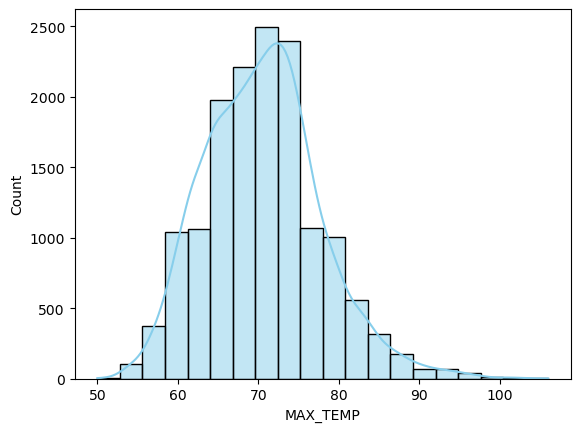

In [7]:
sns.histplot(data=df['MAX_TEMP'], kde=True, bins=20, color='skyblue')

### LAGGED_AVG_WIND_SPEED Counts Visualized

<Axes: xlabel='LAGGED_AVG_WIND_SPEED', ylabel='Count'>

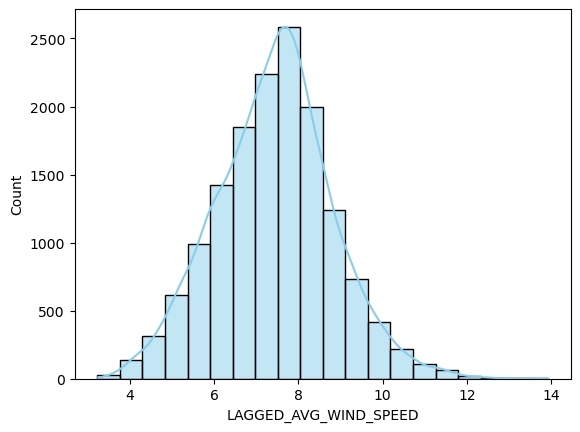

In [10]:
sns.histplot(data=df['LAGGED_AVG_WIND_SPEED'], kde=True, bins=20, color='skyblue')

### DAY_OF_YEAR Counts Visualized

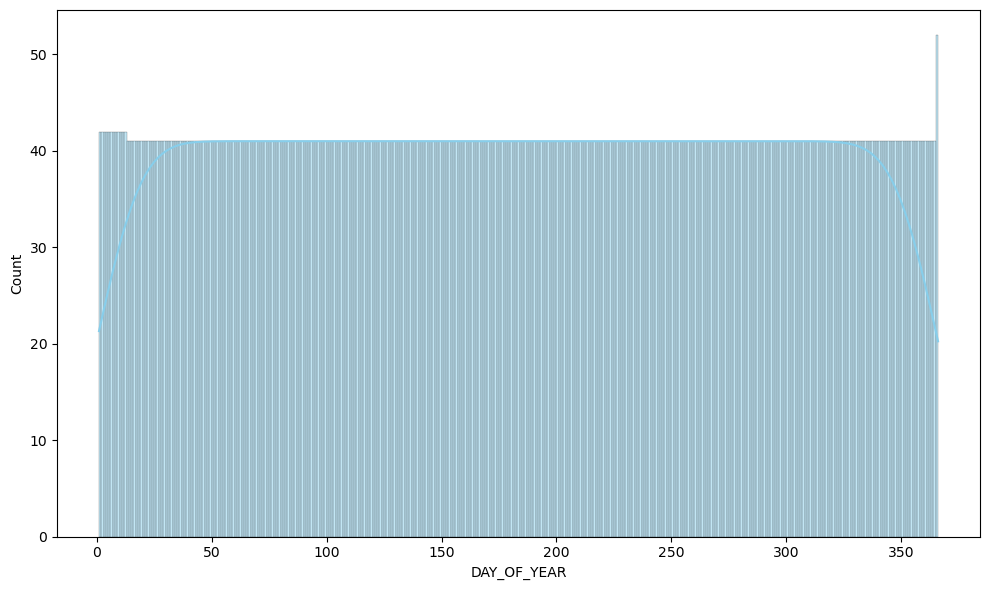

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['DAY_OF_YEAR'], kde=True, bins=365, color='skyblue')
plt.tight_layout()

### MAX_TEMP Counts Visualized

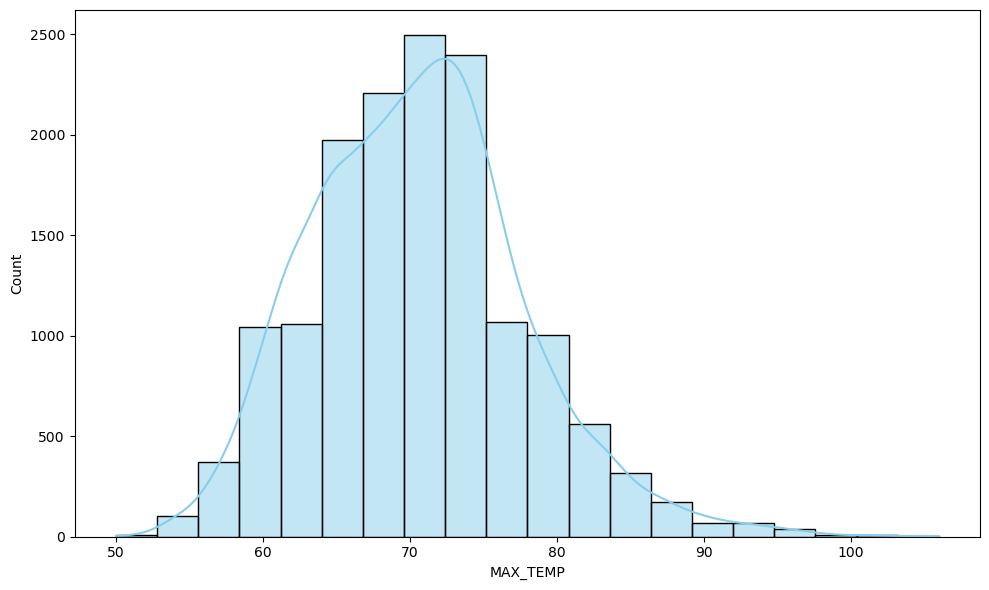

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['MAX_TEMP'], kde=True, bins=20, color='skyblue')
plt.tight_layout()

### FIRE_START_DAY Counts Visualized

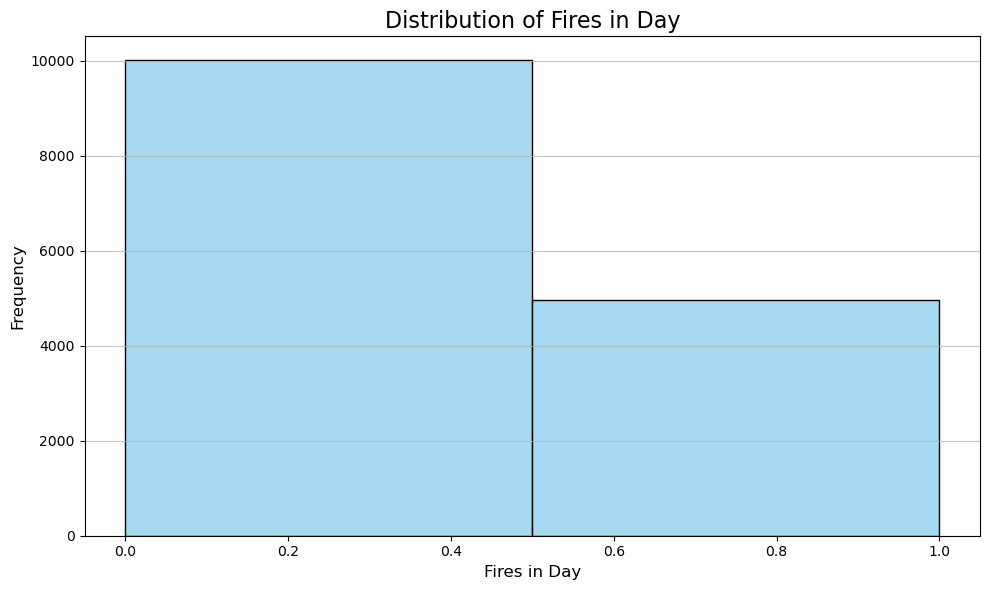

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FIRE_START_DAY'], color='skyblue', bins=2)
plt.title('Distribution of Fires in Day', fontsize=16)
plt.xlabel('Fires in Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

<Axes: xlabel='FIRE_START_DAY', ylabel='count'>

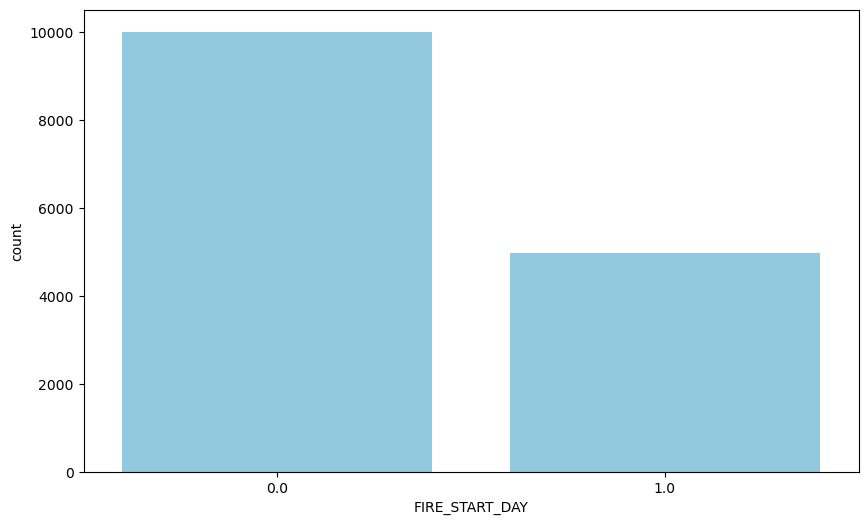

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="FIRE_START_DAY", color='skyblue')


### AVG_WIND_SPEED v MAX_TEMP Scatter Plot

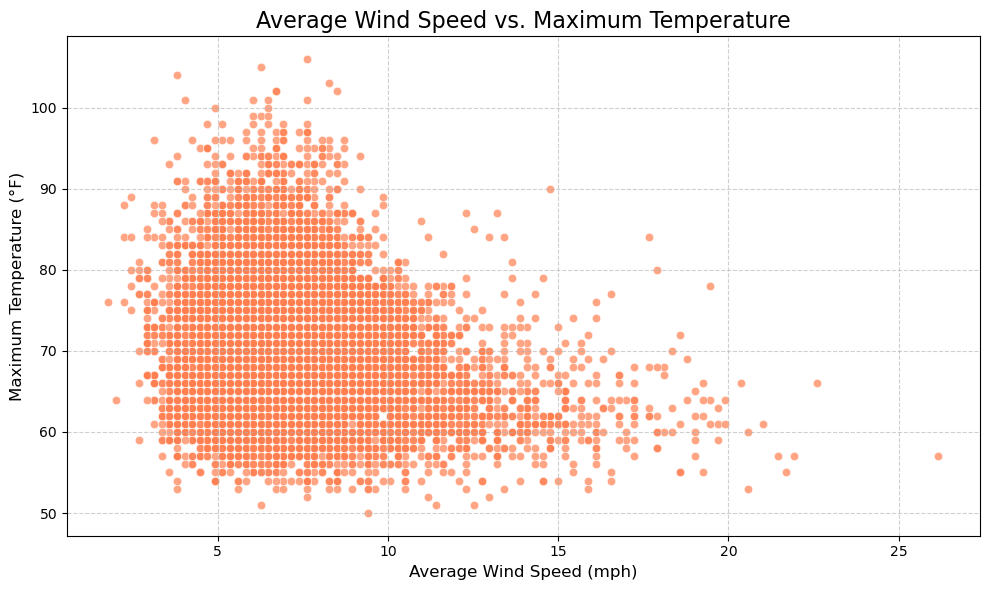

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_WIND_SPEED', y='MAX_TEMP', data=df, alpha=0.7, color='coral')
plt.title('Average Wind Speed vs. Maximum Temperature', fontsize=16)
plt.xlabel('Average Wind Speed (mph)', fontsize=12)
plt.ylabel('Maximum Temperature (°F)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### DAYS_OF_YEAR v PRECIPITATION Line Plot

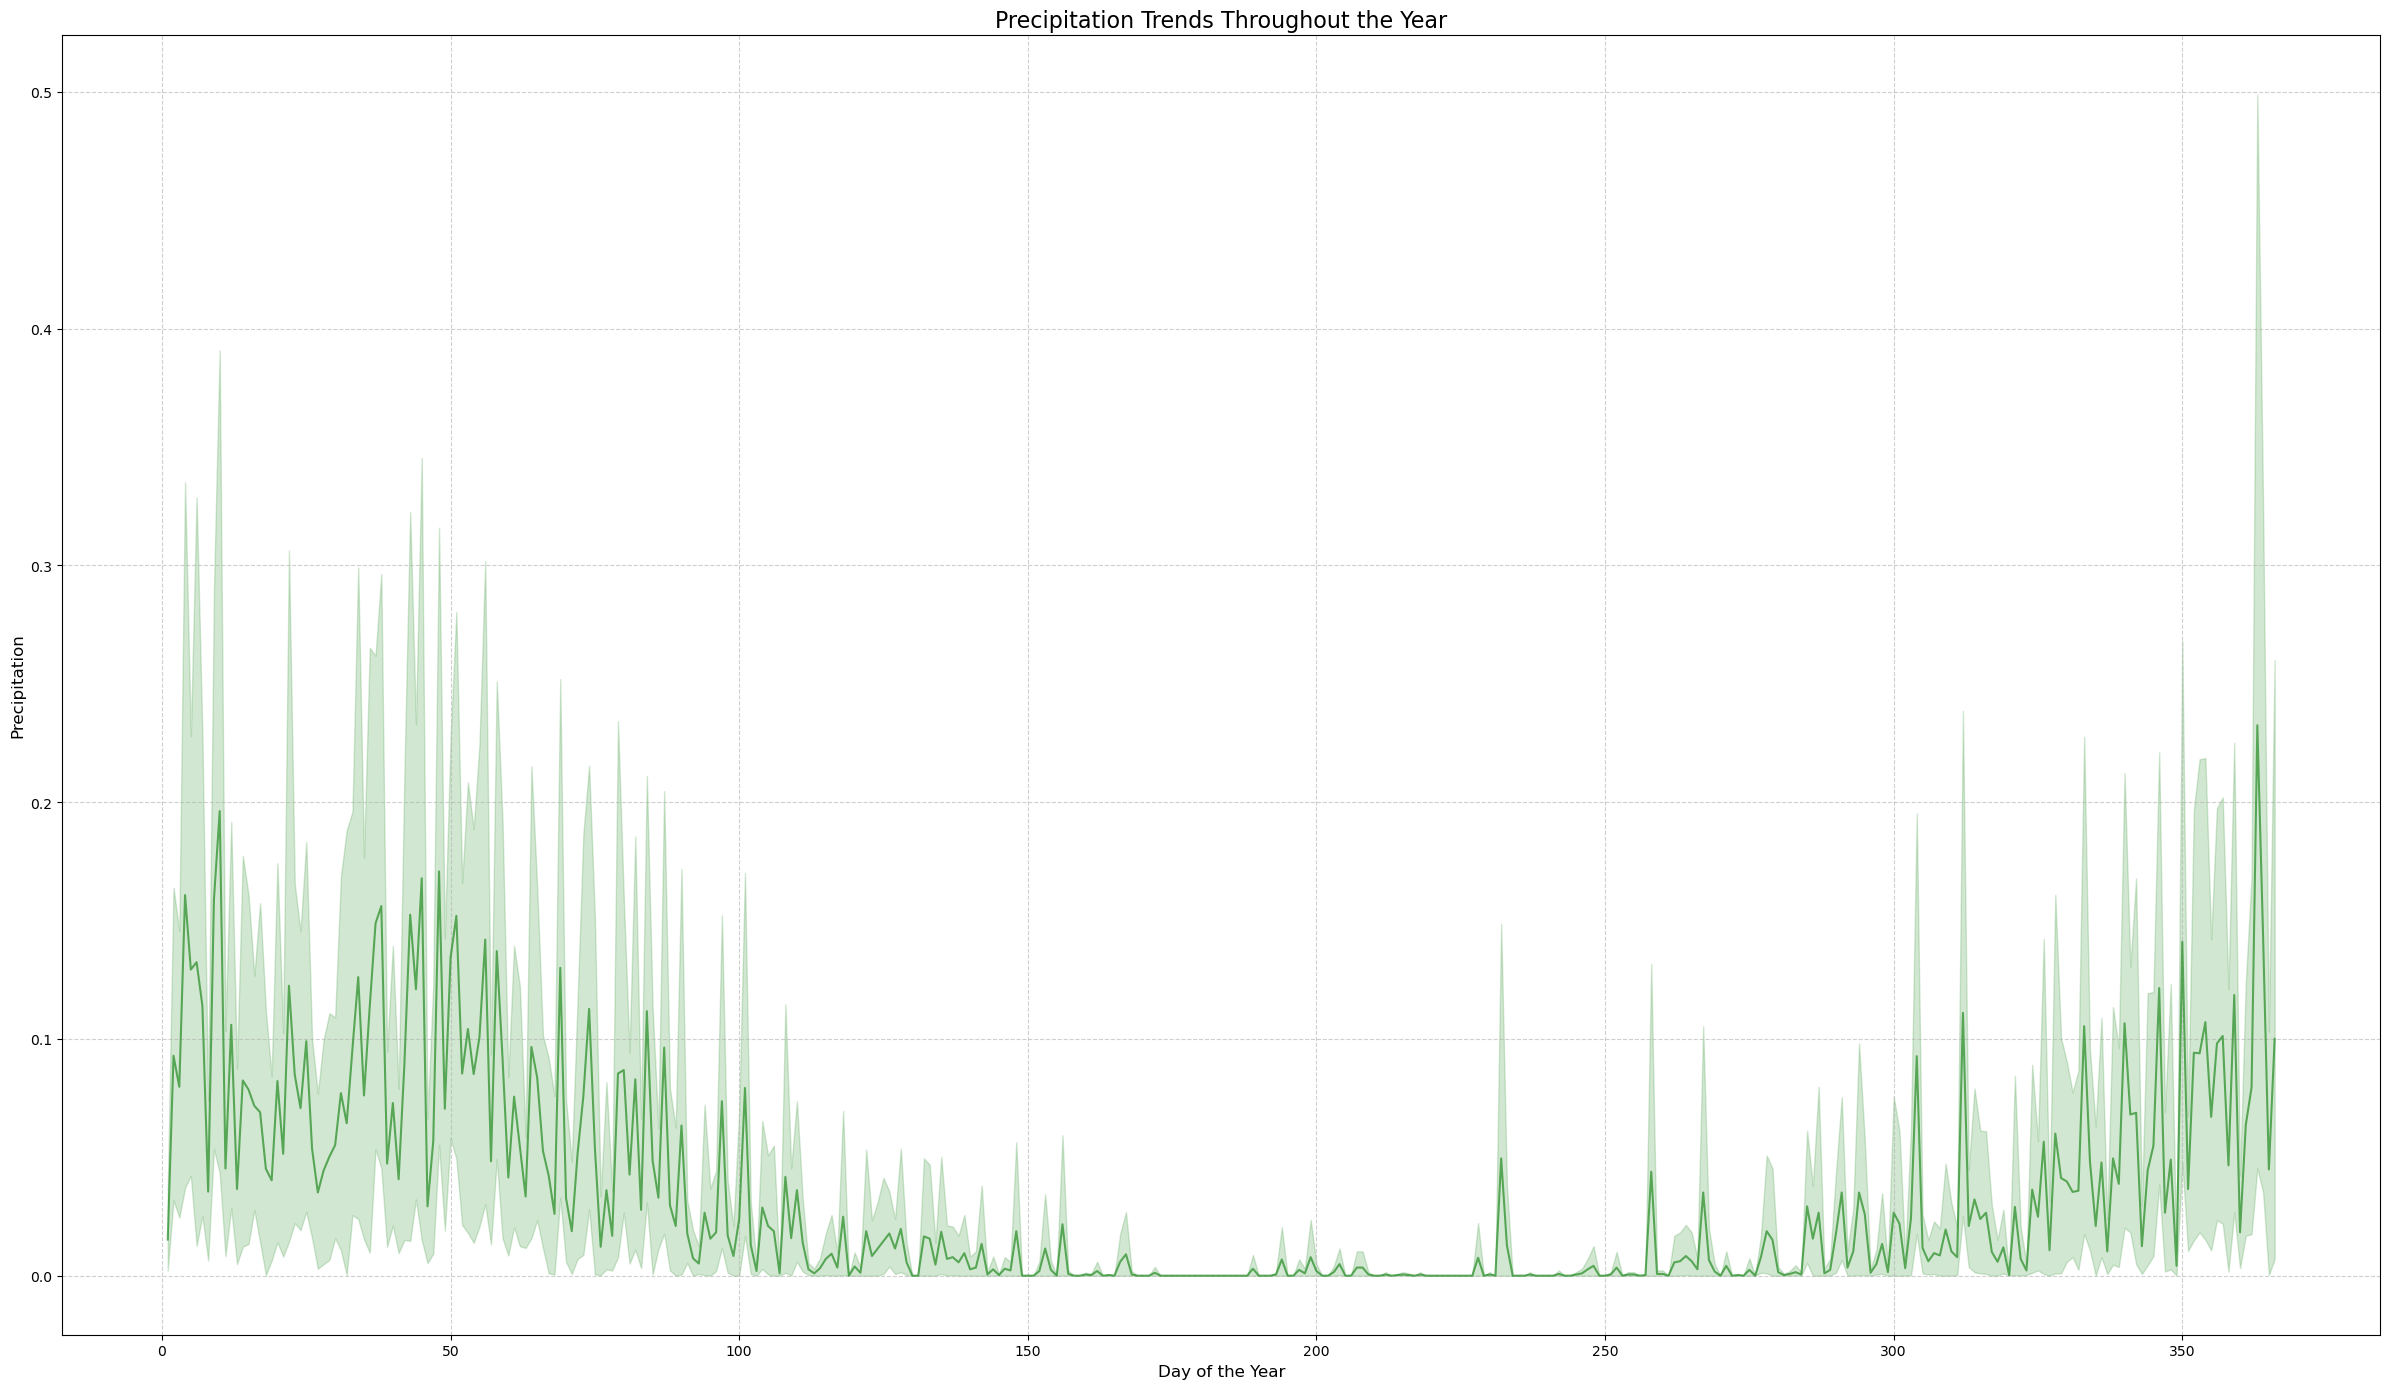

In [11]:
df_sorted = df.sort_values(by='DAY_OF_YEAR')
plt.figure(figsize=(24, 14))
# Using a slightly transparent line to show density if there are multiple years
sns.lineplot(x='DAY_OF_YEAR', y='PRECIPITATION', data=df_sorted, color='forestgreen', alpha=0.7)
plt.title('Precipitation Trends Throughout the Year', fontsize=16)
plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Precipitation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Pairplot

<Figure size 1200x700 with 0 Axes>

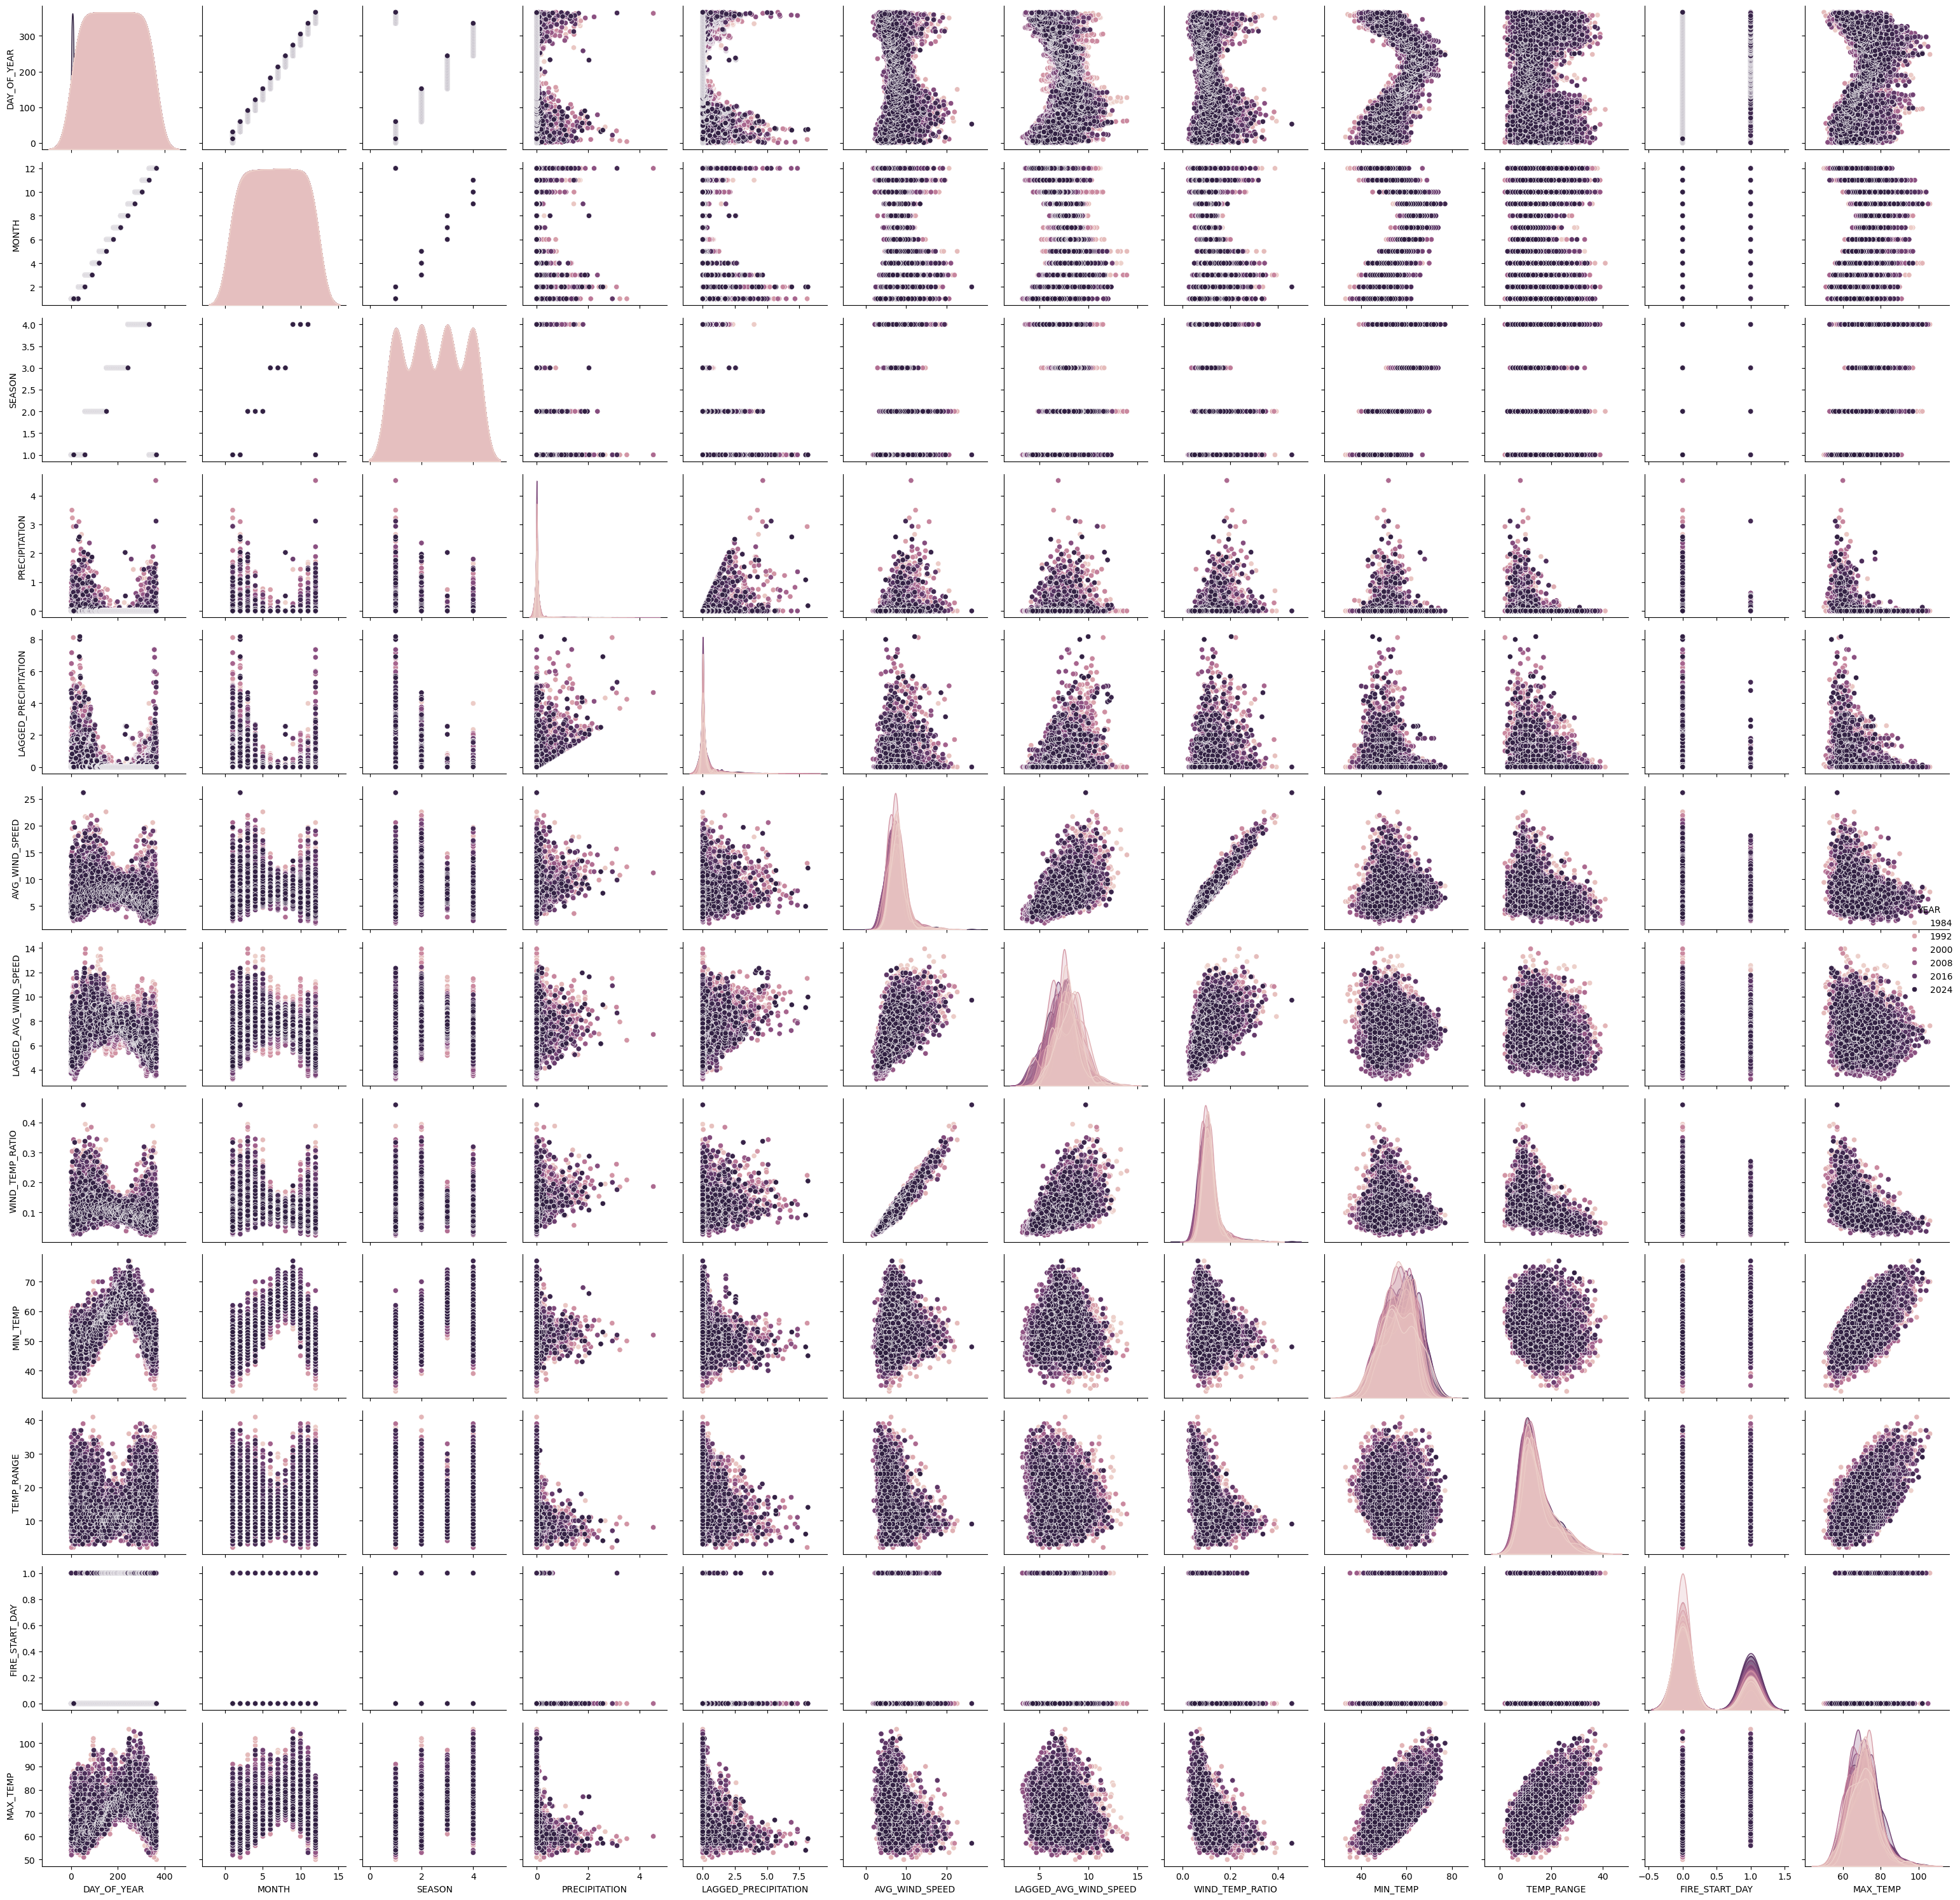

In [10]:
plt.figure(figsize=(12, 7))
sns.pairplot(df, hue="YEAR")
plt.tight_layout()
plt.show()

### AVG_WIND_SPEED V MAX_TEMP Joint Plot

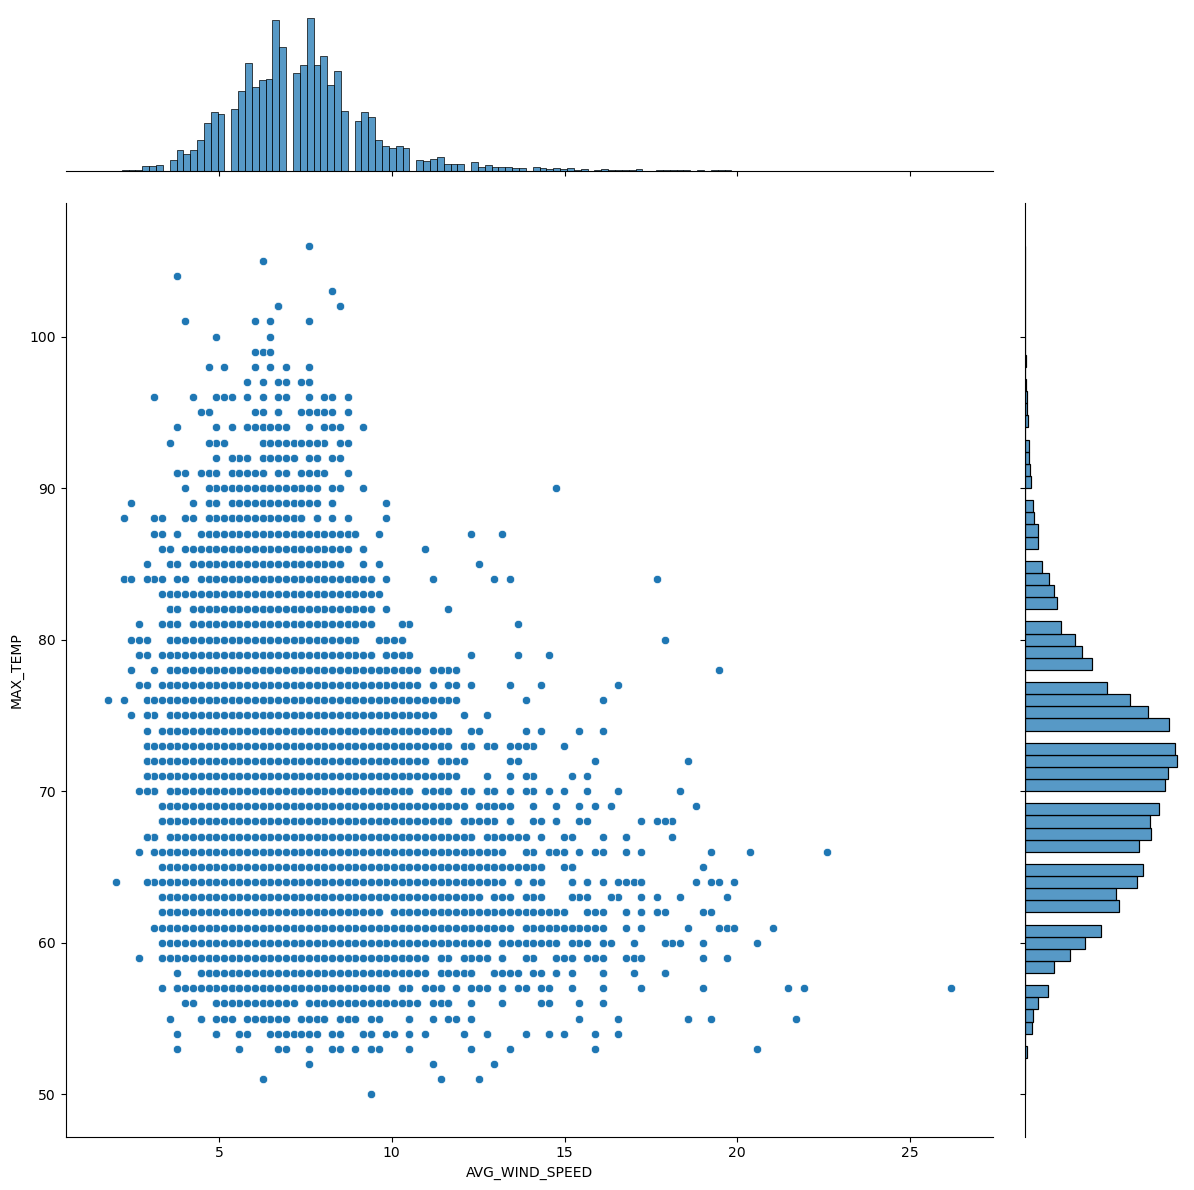

In [19]:
# plt.figure(figsize=(42, 28))        # does not work
sns.jointplot(data=df, x="AVG_WIND_SPEED", y="MAX_TEMP", height=12, ratio=5)    # Has special parameters to control size 
plt.show()

### DAY_OF_YEAR v LAGGED_PRECIPITATION

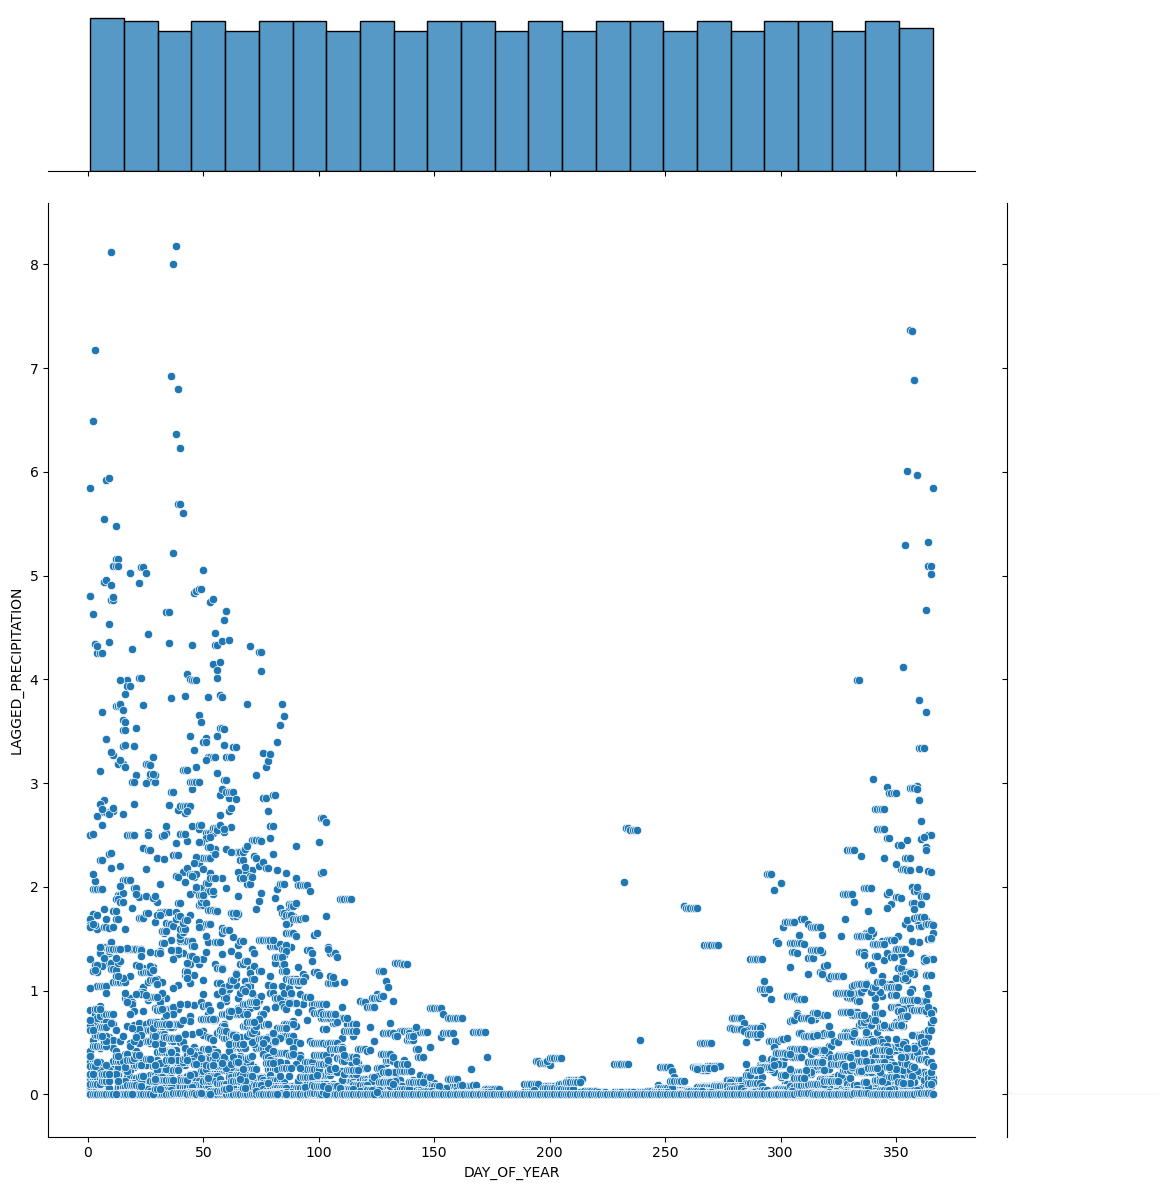

In [5]:
# plt.figure(figsize=(42, 28))        # does not work
sns.jointplot(data=df, x="DAY_OF_YEAR", y="LAGGED_PRECIPITATION", height=12, ratio=5)    # Has special parameters to control size 
plt.show()

### DAY_OF_YEAR v PRECIPITATION

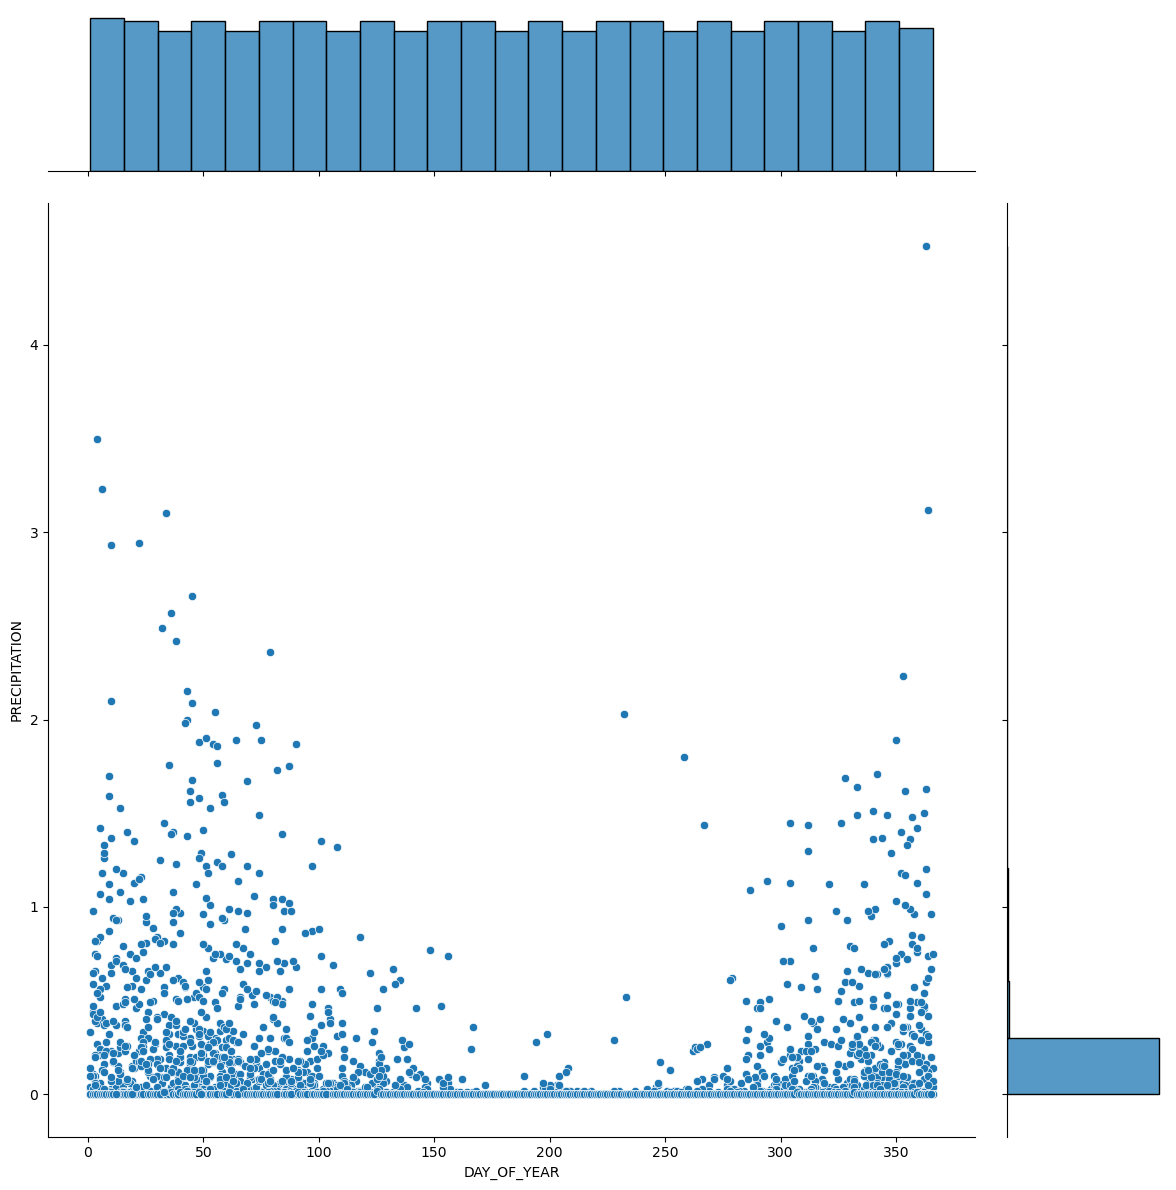

In [4]:
sns.jointplot(data=df, x="DAY_OF_YEAR", y="PRECIPITATION", height=12, ratio=5)    # Has special parameters to control size 
plt.show()

### FIRE_START_DAY v MAX_TEMP

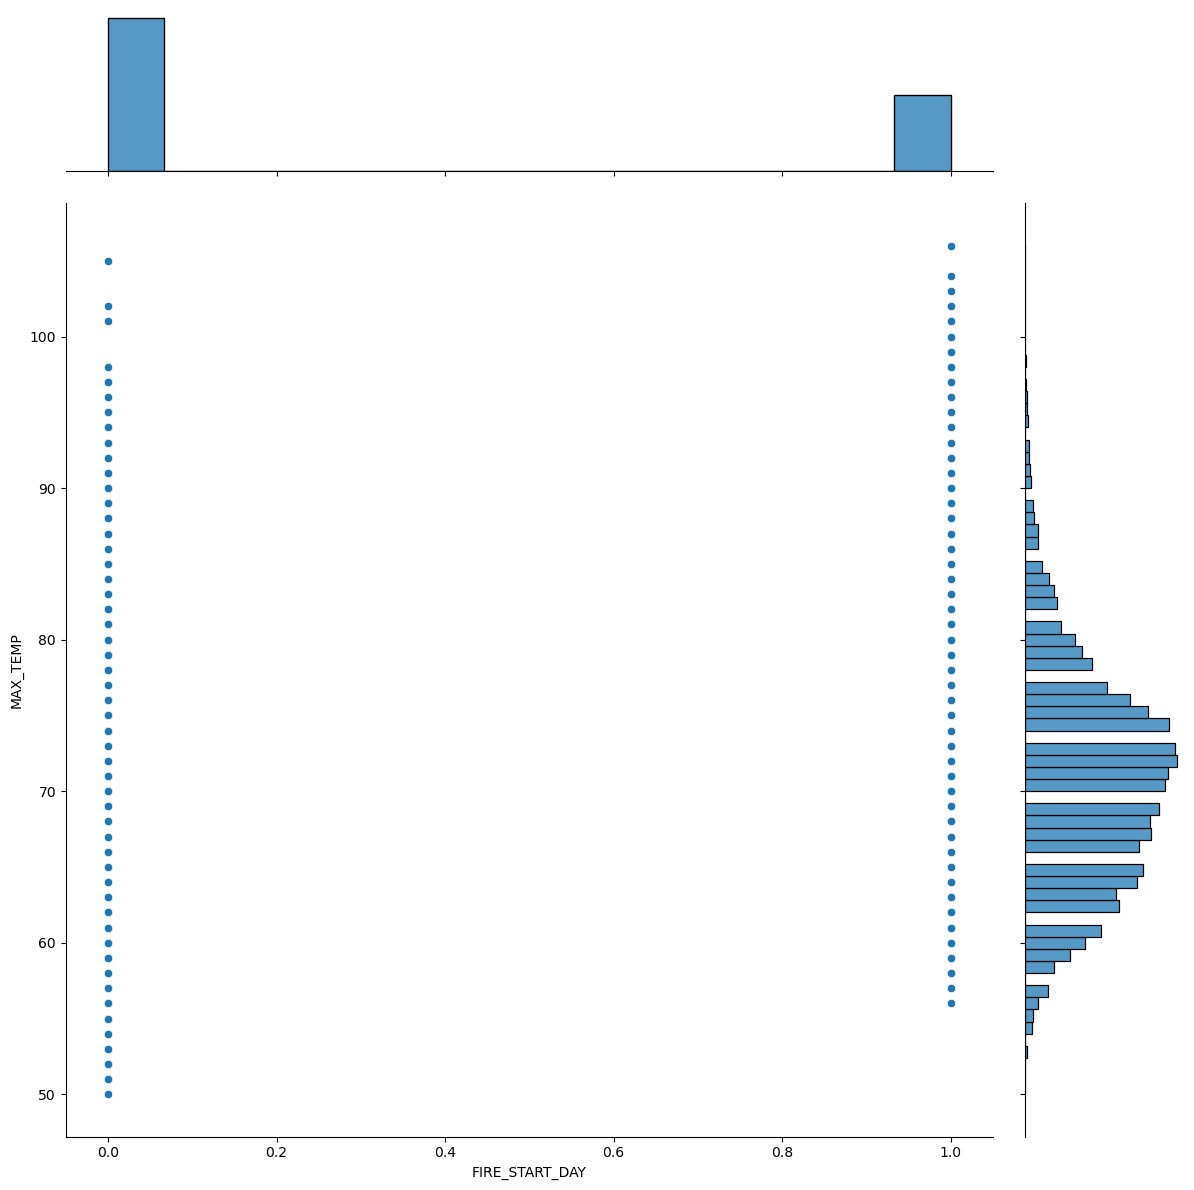

In [6]:
sns.jointplot(data=df, x="FIRE_START_DAY", y="MAX_TEMP", height=12, ratio=5)    # Has special parameters to control size 
plt.show()

### End